<a href="https://colab.research.google.com/github/karthikeyanmuthurangam/extensive-vision-ai-program/blob/master/Session3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


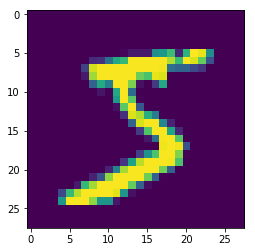

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [109]:
from keras.layers import Activation
model = Sequential()

dropout = 0.1

# Convolution Block - 1
model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1), bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(32, 3,3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Transition Block - 1
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Convolution Block - 2
model.add(Convolution2D(16, 3,3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(16, 3, 3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(16, 3, 3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Transition Block - 2
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Convolution2D(10, 3, 3))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., use_bias=False)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_102 (Bat (None, 26, 26, 32)        128       
_________________________________________________________________
activation_105 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_145 (Dropout)        (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 24, 24, 32)        9216      
_________________________________________________________________
batch_normalization_103 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
activation_106 (Activation)  (None, 24, 24, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [119]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1)

Epoch 1/10
 1280/60000 [..............................] - ETA: 7s - loss: 0.0715 - acc: 0.9617

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 5s 90us/step - loss: 0.0903 - acc: 0.9561
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0928 - acc: 0.9539
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0905 - acc: 0.9556
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0916 - acc: 0.9539
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0909 - acc: 0.9547
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0905 - acc: 0.9548
Epoch 7/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0873 - acc: 0.9565
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0885 - acc: 0.9550
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0877 - acc: 0.9557
Epoch 10/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0882 - acc: 0.9560


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [121]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.02013624126556315, 0.9934]


In [0]:
y_pred = model.predict(X_test)

In [94]:
print(y_pred[:9])
print(y_test[:9])

[[1.05020987e-07 7.21558564e-08 1.22681502e-06 2.34264030e-06
  5.52948016e-08 8.10021916e-09 3.30621606e-11 9.99995828e-01
  1.81871194e-08 3.00186997e-07]
 [3.17303278e-03 7.98462061e-05 9.96653914e-01 5.53060033e-07
  1.02068434e-07 2.07535237e-07 9.10719900e-05 1.06987407e-07
  7.90091235e-07 2.43136157e-07]
 [2.34307049e-06 9.99799907e-01 4.06341678e-06 7.15116721e-06
  5.01177492e-05 4.43514364e-06 2.50267522e-06 1.24349404e-04
  1.54341001e-06 3.64015591e-06]
 [9.99804914e-01 2.44686589e-06 1.14570639e-05 3.67074381e-06
  3.95835798e-07 2.60898232e-05 1.42166260e-04 3.41474174e-06
  1.06412915e-06 4.31001899e-06]
 [2.10624602e-08 3.48476128e-08 1.31220546e-08 4.34023795e-09
  9.99973416e-01 3.53566887e-09 1.34882055e-06 5.15426102e-08
  1.42359184e-07 2.48769920e-05]
 [1.78862547e-06 9.99813139e-01 1.83151133e-06 4.54354631e-06
  2.67487903e-05 3.45890567e-06 2.78986226e-06 1.44017831e-04
  9.72724024e-07 7.93500192e-07]
 [1.46465516e-06 2.73838814e-04 4.27284903e-07 7.35553215e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_38'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

print(Y_train[2])
vis_img_in_filter(np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 'conv2d_38')

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


KeyError: ignored